# Window Functions: Rolling & Expanding Metrics

## Imports

In [93]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from numpy.random import normal, seed, choice


## Rolling window functions with pandas

### Rolling average air quality since 2010 for new york city

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 6291 entries, 2000-01-01 to 2017-03-31
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Ozone   6167 non-null   float64
dtypes: float64(1)
memory usage: 98.3 KB
None


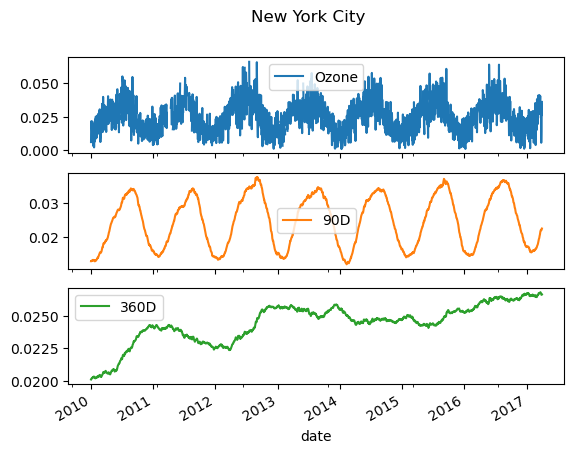

In [94]:
# Import and inspect ozone data here
data = pd.read_csv('ozone.csv', parse_dates=['date'], index_col='date')
print(data.info())

# Calculate 90d and 360d rolling mean for the last price
data['90D'] = data['Ozone'].rolling(window='90D').mean()
data['360D'] = data['Ozone'].rolling(window='360D').mean()

# Plot data
data.loc['2010':].plot(subplots=True, title='New York City')
plt.show()

### Rolling 360-day median & std. deviation for nyc ozone data since 2000

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 6167 entries, 2000-01-01 to 2017-03-31
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Ozone   6167 non-null   float64
dtypes: float64(1)
memory usage: 96.4 KB
None


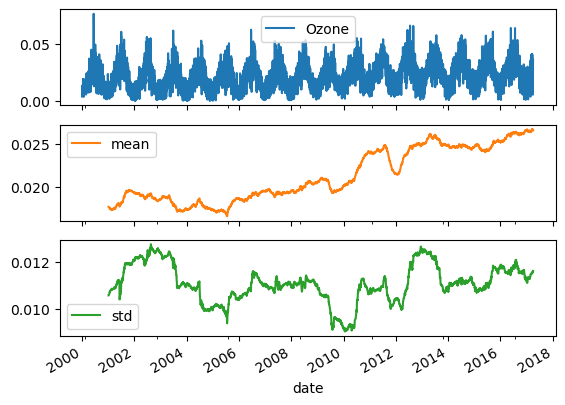

In [95]:
# Import and inspect ozone data here
data = pd.read_csv('ozone.csv', parse_dates=['date'], index_col='date').dropna()
print(data.info())

# Calculate the rolling mean and std here
rolling_stats = data['Ozone'].rolling(window=360).agg(['mean', 'std'])

# Join rolling_stats with ozone data
stats = data.join(rolling_stats)

# Plot stats
stats.plot(subplots=True)
plt.show()

### Rolling quantiles for daily air quality in nyc

In [96]:
data = pd.read_csv('ozone.csv', parse_dates=['date'], index_col='date').dropna()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 6300 entries, 2000-01-01 to 2017-03-31
Freq: D
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Ozone   6300 non-null   float64
dtypes: float64(1)
memory usage: 98.4 KB
None


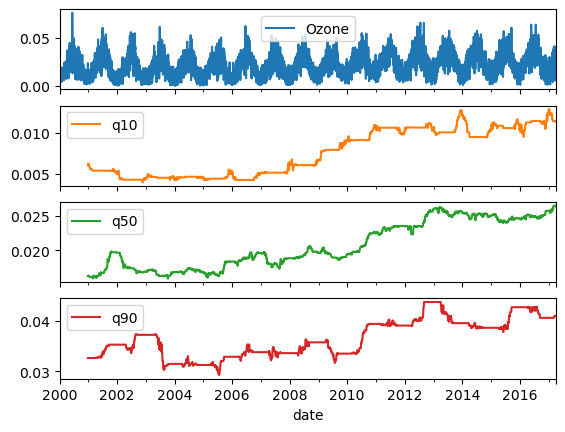

In [97]:
# Resample, interpolate and inspect ozone data here
data = data.resample('D').interpolate()
print(data.info())

# Create the rolling window
rolling = data['Ozone'].rolling(window=360)

# Insert the rolling quantiles to the monthly returns
data['q10'] = rolling.quantile(0.1)
data['q50'] = rolling.quantile(0.5)
data['q90'] = rolling.quantile(0.9)

# Plot the data
data.plot(subplots=True)
plt.show()


## Expanding window functions with pandas

### Cumulative sum vs .diff()

In [98]:
data = pd.read_csv('google.csv', parse_dates=['Date'], index_col='Date')
print(data.info())

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1094 entries, 2014-01-02 to 2016-12-30
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Close   756 non-null    float64
dtypes: float64(1)
memory usage: 17.1 KB
None


In [99]:
# Calculate differences
differences = data.diff().dropna()

# Select start price
start_price = data.first('D')

# Calculate cumulative sum
# cumulative_sum = start_price.append(differences).cumsum()
cumulative_sum = pd.concat([start_price, differences]).cumsum()

# Validate cumulative sum equals data
print(data.equals(cumulative_sum))


False


/tmp/ipykernel_831758/1040244079.py:5: FutureWarning: first is deprecated and will be removed in a future version. Please create a mask and filter using `.loc` instead
  start_price = data.first('D')


### Cumulative return on $1,000 invested in google vs apple I

In [100]:
data = pd.read_csv('apple_google.csv', parse_dates=['Date'], index_col='Date')

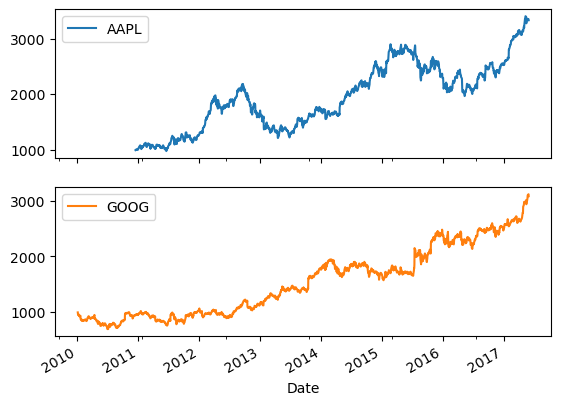

In [101]:
# Define your investment
investment = 1000

# Calculate the daily returns here
returns = data.pct_change()

# Calculate the cumulative returns here
returns_plus_one = returns.add(1)
cumulative_return = returns_plus_one.cumprod()

# Calculate and plot the investment return here 
cumulative_return.mul(investment).plot(subplots=True)
plt.show()

### Cumulative return on $1,000 invested in google vs apple II

In [102]:
data = pd.read_csv('apple_google.csv', parse_dates=['Date'], index_col='Date')

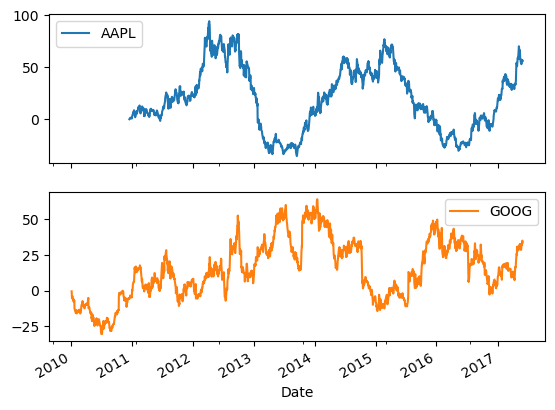

In [103]:
# Import numpy
import numpy as np

# Define a multi_period_return function
def multi_period_return(period_returns):
    return np.prod(period_returns + 1) - 1
    
# Calculate daily returns
daily_returns = data.pct_change()

# Calculate rolling_annual_returns
rolling_annual_returns = daily_returns.rolling(window='360D').apply(multi_period_return)

# Plot rolling_annual_returns
rolling_annual_returns.mul(100).plot(subplots=True)
plt.show()


## Case study: S&P500 price simulation

### Random walk I

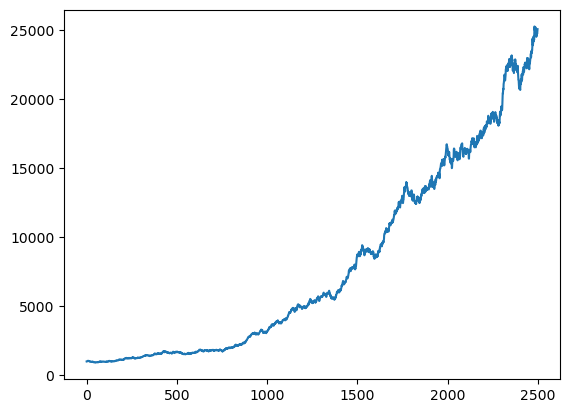

In [104]:
# Set seed here
seed(42)

# Create random_walk
random_walk = normal(size=2500, loc=.001, scale=.01)

# Convert random_walk to pd.series
random_walk = pd.Series(random_walk)

# Create random_prices
random_prices = random_walk.add(1).cumprod()

# Plot random_prices here
random_prices.mul(1000).plot()
plt.show()

### Random walk II

In [105]:
fb = pd.read_csv(
    'fb.csv',
    parse_dates=['date'], index_col='date'
)
fb = fb['price']

/tmp/ipykernel_831758/3881755255.py:17: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(random_walk)


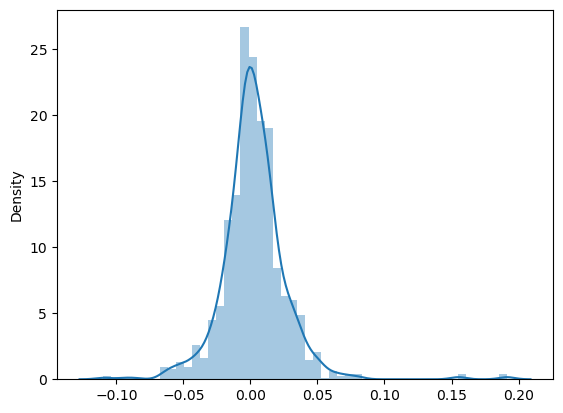

In [106]:
# Set seed here
seed(42)

# Calculate daily_returns here
daily_returns = fb.pct_change().dropna()

# Get n_obs
n_obs = daily_returns.count()

# Create random_walk
random_walk = choice(daily_returns, size=n_obs)

# Convert random_walk to pd.series
random_walk = pd.Series(random_walk)

# Plot random_walk distribution
sns.distplot(random_walk)
plt.show()


### Random walk III

In [107]:
fb = pd.read_csv(
    'fb.csv',
    parse_dates=['date'], index_col='date'
)

# Create random_walk
random_walk = choice(daily_returns, size=n_obs)

# Convert random_walk to pd.series
random_walk = pd.Series(random_walk, index=fb.index[1:])

/tmp/ipykernel_831758/1609446300.py:2: FutureWarning: first is deprecated and will be removed in a future version. Please create a mask and filter using `.loc` instead
  start = fb['price'].first('D')


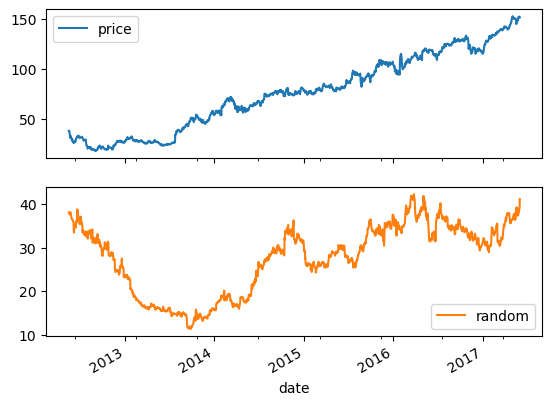

In [108]:
# Select fb start price here
start = fb['price'].first('D')

# Add 1 to random walk and append to start
random_walk = random_walk.add(1)
random_price = pd.concat([start, random_walk])
# start.append(random_walk)

# Calculate cumulative product here
random_price = random_price.cumprod()

# Insert into fb and plot
fb['random'] = random_price

# Plot fb data
fb.plot(subplots=True)
plt.show()


## Relationships between time series: correlation

### Annual return correlations among several stocks

In [109]:
data = pd.read_csv('5_stocks.csv', parse_dates=['Date'], index_col='Date')

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4001 entries, 2001-07-05 to 2017-05-31
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AAPL    4000 non-null   float64
 1   AMZN    4000 non-null   float64
 2   IBM     4000 non-null   float64
 3   WMT     4000 non-null   float64
 4   XOM     4000 non-null   float64
dtypes: float64(5)
memory usage: 187.5 KB
None
          AAPL      AMZN       IBM       WMT       XOM
AAPL  1.000000  0.208731  0.460568 -0.183553  0.336413
AMZN  0.208731  1.000000  0.346407 -0.367620 -0.133965
IBM   0.460568  0.346407  1.000000  0.155445  0.367253
WMT  -0.183553 -0.367620  0.155445  1.000000  0.178833
XOM   0.336413 -0.133965  0.367253  0.178833  1.000000


/tmp/ipykernel_831758/2237368421.py:5: FutureWarning: 'A' is deprecated and will be removed in a future version, please use 'YE' instead.
  annual_prices = data.resample('A').last()


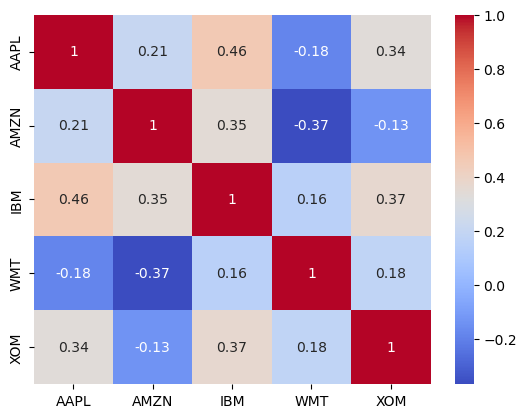

In [110]:
# Inspect data here
print(data.info())

# Calculate year-end prices here
annual_prices = data.resample('A').last()

# Calculate annual returns here
annual_returns = annual_prices.pct_change()

# Calculate and print the correlation matrix here
correlations = annual_returns.corr()
print(correlations)

# Visualize the correlations as heatmap here
sns.heatmap(correlations, annot=True, cmap='coolwarm')
plt.show()
